In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 37.8 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Input, MaxPooling2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import ModelCheckpoint
import plotly.express as px
from numpy import expand_dims
import cv2 as cv
import os
from sklearn.utils import shuffle
from  tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer

In [ ]:
#path = '/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset_test_1/dataset/asl_dataset/asl_dataset'
path = '/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset_test_2'
#path = '/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset-test-proba/dataset/dataset/asl_dataset/asl_dataset' #samo jedan znak T - gori rezultati

In [ ]:
test_dir = path
a = fr'{test_dir}/A'
b = fr'{test_dir}/B'
c = fr'{test_dir}/C'
d = fr'{test_dir}/D'
e = fr'{test_dir}/E'
f = fr'{test_dir}/F'
g = fr'{test_dir}/G'
h = fr'{test_dir}/H'
i = fr'{test_dir}/I'
k = fr'{test_dir}/K'
l = fr'{test_dir}/L'
m = fr'{test_dir}/M'
n = fr'{test_dir}/N'
o = fr'{test_dir}/O'
p = fr'{test_dir}/P'
q = fr'{test_dir}/Q'
r = fr'{test_dir}/R'
s = fr'{test_dir}/S'
t = fr'{test_dir}/T'
u = fr'{test_dir}/U'
v = fr'{test_dir}/V'
w = fr'{test_dir}/W'
x = fr'{test_dir}/X'
y = fr'{test_dir}/Y'

In [ ]:
# ImageDataGenerator - flow from directory

In [ ]:
labels = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

In [ ]:
x_test=[]
y_test=[]

for i in labels:
    folderpath = fr'{test_dir}/{i}'
    for j in tqdm(os.listdir(folderpath)):
        img = cv.imread(os.path.join(folderpath,j))
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x_test.append(img)
        y_test.append(i)

x_test = np.array(x_test)
y_test = np.array(y_test) 

100%|██████████| 70/70 [00:52<00:00,  1.33it/s]


In [ ]:
y_data_new = []
for i in y_test:
    index = labels.index(i)
    if(index>=9):
      y_data_new.append(index+1)
    else:
      y_data_new.append(index)
y_test = y_data_new

y_test = np.array(y_test)

In [ ]:
x_test, y_test = shuffle(x_test, y_test, random_state=0)
y = y_test

In [ ]:
print(x_test.shape)
print(y_test.shape)

(1680, 50, 50, 3)
(1680,)


In [ ]:
label_binarizer = LabelBinarizer()
y_test = label_binarizer.fit_transform(y_test)

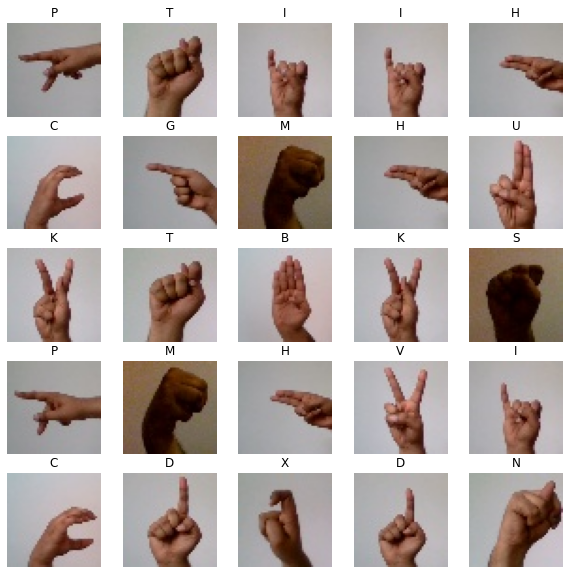

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5,5, i + 1)
  plt.title(labels[np.argmax(y_test[i])])
  plt.imshow(x_test[i])
  plt.axis("off")

**Model- RGB - AUG 3**

In [ ]:
x_test1 = x_test.copy()

In [ ]:
x_test1 = tf.image.resize(x_test1, [28, 28])

In [ ]:
x_test1.shape

TensorShape([1680, 28, 28, 3])

In [ ]:
x_test1 /= 255

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_rgb_aug3.hdf5')

In [ ]:
model.evaluate(x_test1, y_test)

53/53 [==============================] - 1s 6ms/step - loss: 5.8189 - accuracy: 0.4214 - f1_score: 0.3988 - precision: 0.4271 - recall: 0.4149


[5.818905353546143,
 0.4214285612106323,
 array([0.4893617 , 0.86419755, 0.6306306 , 1.        , 0.        ,
        0.49462366, 0.        , 0.4745763 , 0.82352936, 0.        ,
        1.        , 0.04195804, 0.        , 0.8536585 , 0.1884058 ,
        0.12195122, 0.76106197, 0.        , 0.        , 0.37209302,
        0.50179213, 0.02739726, 0.02298851, 0.9032258 ], dtype=float32),
 0.4270833432674408,
 0.4148809611797333]

In [ ]:
predict_x= model.predict(x_test1) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)

53/53 [==============================] - 0s 2ms/step
[ 7 12  8 ... 23  7 20]


In [ ]:
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

In [ ]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.96      0.33      0.49        70
           1       0.76      1.00      0.86        70
           2       0.85      0.50      0.63        70
           3       1.00      1.00      1.00        70
           4       0.00      0.00      0.00        70
           5       1.00      0.33      0.49        70
           6       0.00      0.00      0.00        70
           7       0.31      1.00      0.47        70
           8       1.00      0.70      0.82        70
          10       0.00      0.00      0.00        70
          11       1.00      1.00      1.00        70
          12       0.04      0.04      0.04        70
          13       0.00      0.00      0.00        70
          14       0.74      1.00      0.85        70
          15       0.19      0.19      0.19        70
          16       0.11      0.14      0.12        70
          17       1.00      0.61      0.76        70
          18       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


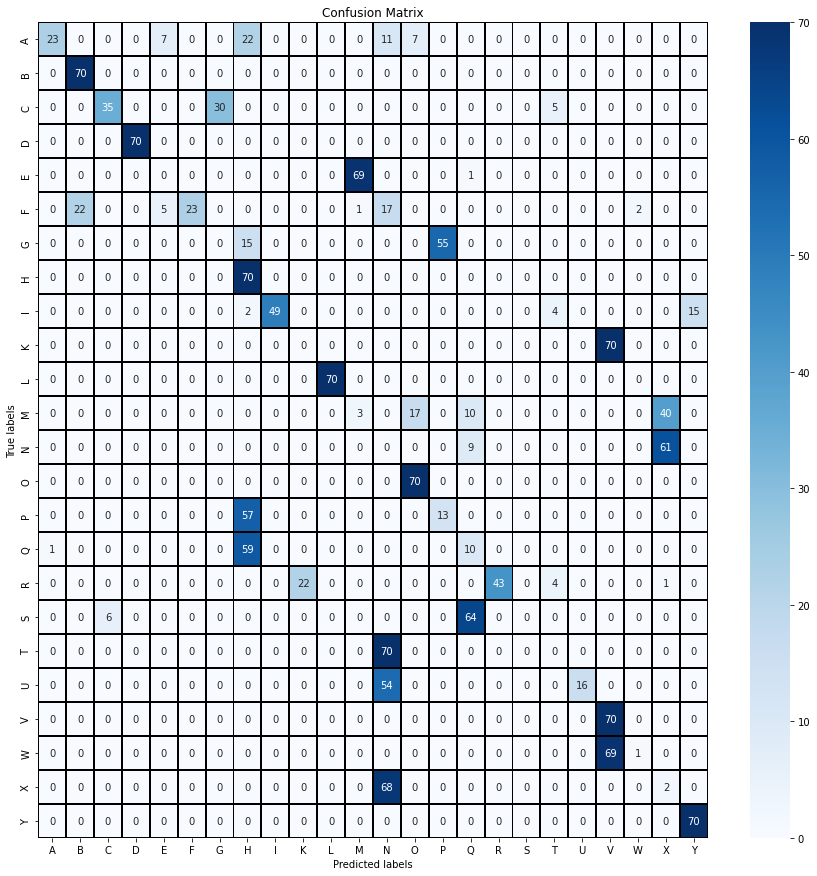

In [ ]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm, index = [i for i in range(25) if i!=9] , columns = [i for i in range(25) if i!=9])
plt.figure(figsize = (15,15))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

**Model RGB - AUG 4**

In [ ]:
x_test4 = x_test.copy()

In [ ]:
x_test4 = tf.image.resize(x_test4, [28, 28])
print(x_test4.shape)

(1680, 28, 28, 3)


In [ ]:
x_test4 /= 255

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_rgb_aug4.hdf5')

In [ ]:
model.evaluate(x_test4, y_test)

53/53 [==============================] - 8s 6ms/step - loss: 13.2699 - accuracy: 0.4262 - f1_score: 0.3801 - precision: 0.4296 - recall: 0.4232


[13.269872665405273,
 0.42619046568870544,
 array([0.5517242 , 0.02631579, 0.82352936, 0.8130081 , 0.        ,
        0.4329897 , 0.        , 0.6698565 , 0.18181819, 0.        ,
        1.        , 0.        , 0.        , 0.7407407 , 0.08163266,
        0.31180403, 0.7234043 , 0.        , 0.        , 0.9324324 ,
        0.60606056, 0.76106197, 0.        , 0.46551725], dtype=float32),
 0.42960724234580994,
 0.42321428656578064]

In [ ]:
predict_x= model.predict(x_test4) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)

53/53 [==============================] - 0s 2ms/step
[ 7  0 23 ... 18  7 20]


In [ ]:
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

In [ ]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        70
           1       0.17      0.01      0.03        70
           2       1.00      0.70      0.82        70
           3       0.94      0.71      0.81        70
           4       0.00      0.00      0.00        70
           5       0.78      0.30      0.43        70
           6       0.00      0.00      0.00        70
           7       0.50      1.00      0.67        70
           8       1.00      0.10      0.18        70
          10       0.00      0.00      0.00        70
          11       1.00      1.00      1.00        70
          12       0.00      0.00      0.00        70
          13       0.00      0.00      0.00        70
          14       0.59      1.00      0.74        70
          15       0.06      0.11      0.08        70
          16       0.18      1.00      0.31        70
          17       0.72      0.73      0.72        70
          18       0.00    

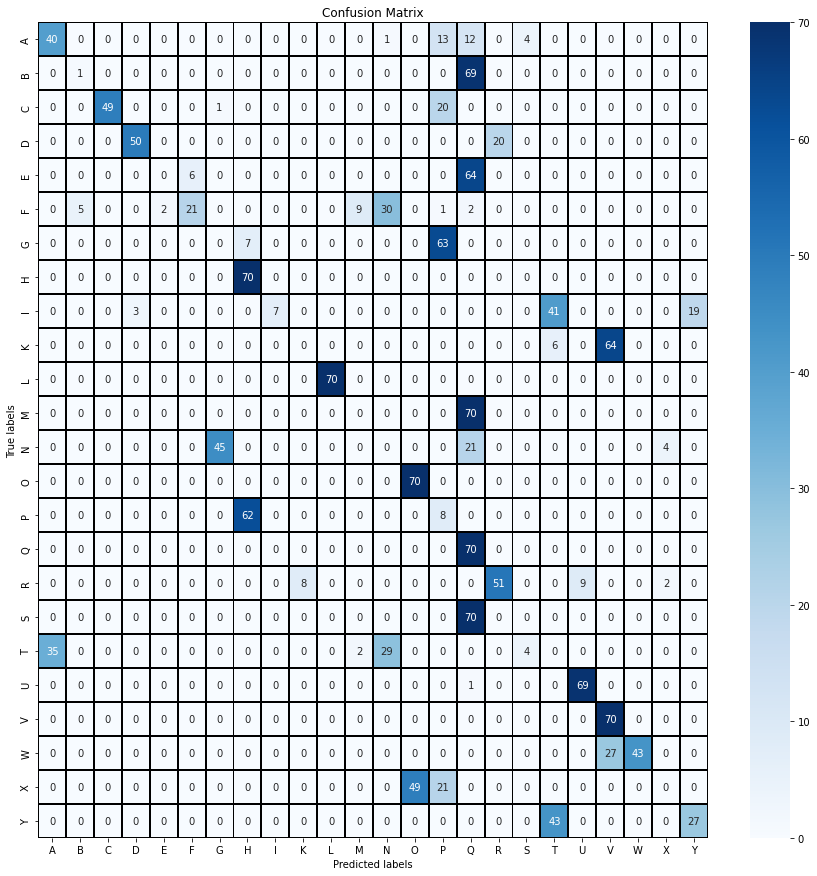

In [ ]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm, index = [i for i in range(25) if i!=9] , columns = [i for i in range(25) if i!=9])
plt.figure(figsize = (15,15))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

**Model 6 - RGB**

In [ ]:
x_test2 = x_test.copy()

In [ ]:
x_test2 = tf.image.resize(x_test2, [28, 28])
print(x_test2.shape)

(1680, 28, 28, 3)


In [ ]:
x_test2 /= 255

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model6_rgb.hdf5')

In [ ]:
model.evaluate(x_test2, y_test)

53/53 [==============================] - 1s 5ms/step - loss: 10.1983 - accuracy: 0.3149 - f1_score: 0.2519 - precision: 0.3186 - recall: 0.3143


[10.198296546936035,
 0.31488096714019775,
 array([0.15686275, 0.17977528, 0.5263158 , 0.56410253, 0.        ,
        0.7155963 , 0.        , 0.2330097 , 0.05555555, 0.        ,
        0.80459774, 0.        , 0.        , 0.4204204 , 0.        ,
        0.05084746, 0.07228915, 0.        , 0.        , 0.9150326 ,
        0.7909605 , 0.        , 0.02597403, 0.53435117], dtype=float32),
 0.31864815950393677,
 0.3142857253551483]

In [ ]:
predict_x= model.predict(x_test2) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)

53/53 [==============================] - 0s 3ms/step
[ 7 12 23 ... 23  7 18]


In [ ]:
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

In [ ]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.25      0.11      0.16        70
           1       0.42      0.11      0.18        70
           2       0.56      0.50      0.53        70
           3       0.51      0.63      0.56        70
           4       0.00      0.00      0.00        70
           5       1.00      0.56      0.72        70
           6       0.00      0.00      0.00        70
           7       0.15      0.51      0.23        70
           8       1.00      0.03      0.06        70
          10       0.00      0.00      0.00        70
          11       0.67      1.00      0.80        70
          12       0.00      0.00      0.00        70
          13       0.00      0.00      0.00        70
          14       0.27      1.00      0.42        70
          15       0.00      0.00      0.00        70
          16       0.06      0.04      0.05        70
          17       0.23      0.04      0.07        70
          18       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


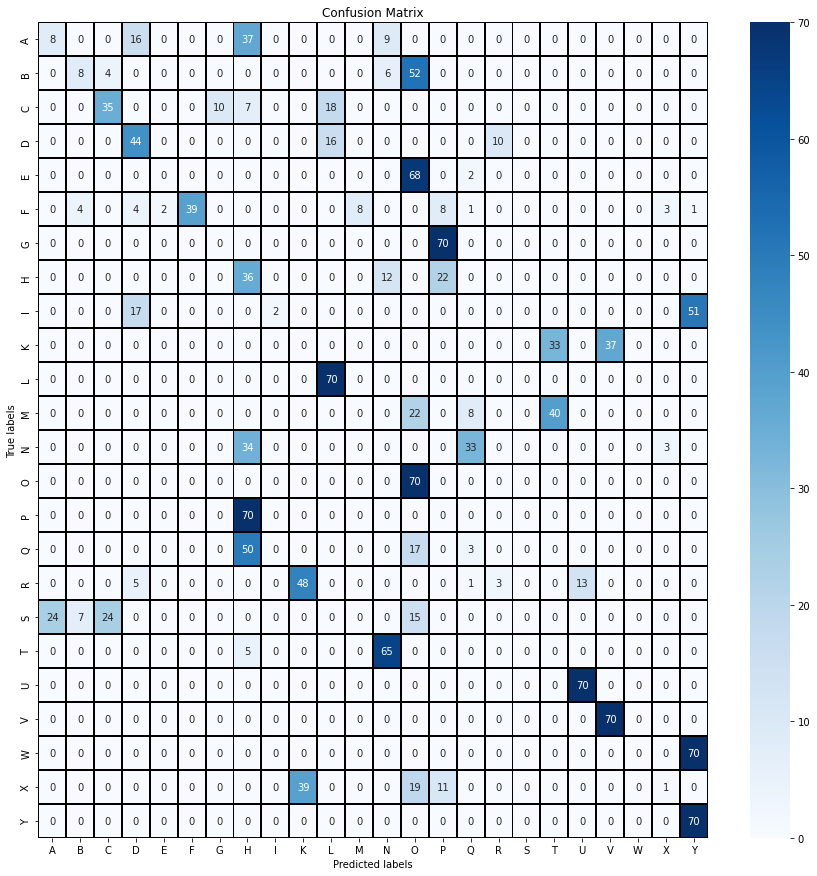

In [ ]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm, index = [i for i in range(25) if i!=9] , columns = [i for i in range(25) if i!=9])
plt.figure(figsize = (15,15))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

**TL - FT - MobileNet**

In [ ]:
x_test3 = x_test.copy()

In [ ]:
x_test3 = tf.image.resize(x_test3, [75, 75])
print(x_test3.shape)

(1680, 75, 75, 3)


In [ ]:
x_test3 = tf.keras.applications.mobilenet.preprocess_input(x_test3)

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_ft_mobilenet.hdf5')

In [ ]:
model.evaluate(x_test3, y_test)

53/53 [==============================] - 1s 12ms/step - loss: 35.3284 - accuracy: 0.1423 - f1_score: 0.1289 - precision: 0.1418 - recall: 0.1417


[35.328369140625,
 0.14226190745830536,
 array([0.        , 0.        , 0.3333333 , 0.        , 0.        ,
        0.        , 0.21428572, 0.47826087, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.46357614, 0.13333334,
        0.65420556, 0.01801802, 0.        , 0.        , 0.        ,
        0.44444448, 0.22500002, 0.12844037, 0.        ], dtype=float32),
 0.1418355256319046,
 0.14166666567325592]

In [ ]:
predict_x= model.predict(x_test3) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)

53/53 [==============================] - 1s 7ms/step
[18 11 18 ... 18 18  5]


In [ ]:
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

In [ ]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.00      0.00      0.00        70
           2       1.00      0.20      0.33        70
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00        70
           5       0.00      0.00      0.00        70
           6       0.21      0.21      0.21        70
           7       1.00      0.31      0.48        70
           8       0.00      0.00      0.00        70
          10       0.00      0.00      0.00        70
          11       0.00      0.00      0.00        70
          12       0.00      0.00      0.00        70
          13       0.00      0.00      0.00        70
          14       0.30      1.00      0.46        70
          15       1.00      0.07      0.13        70
          16       0.49      1.00      0.65        70
          17       0.02      0.01      0.02        70
          18       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


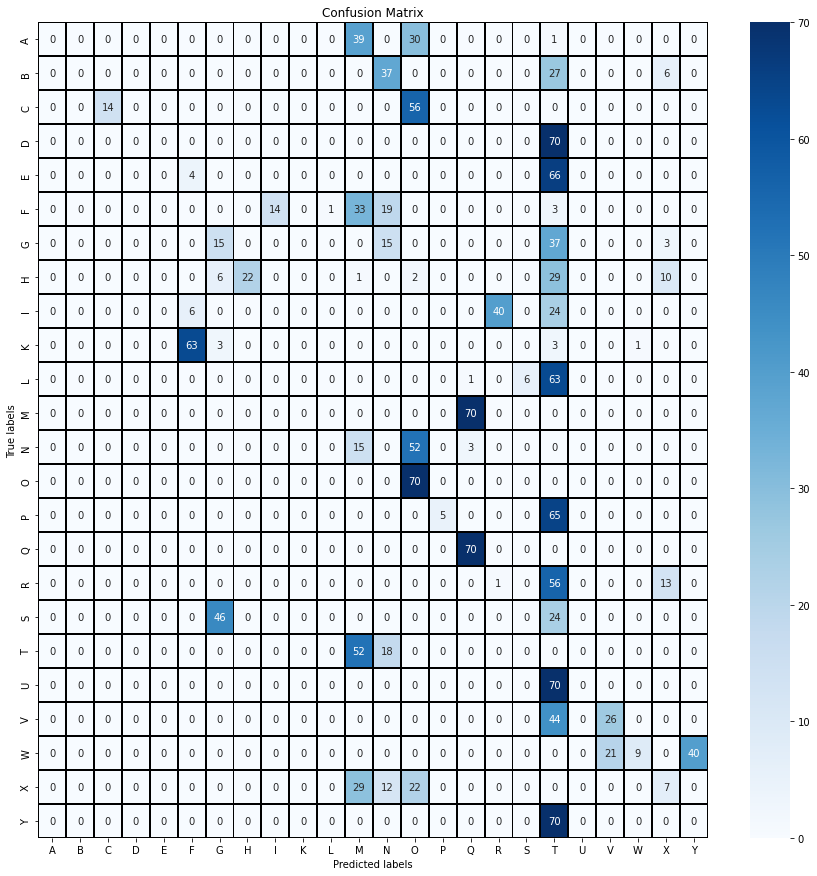

In [ ]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm, index = [i for i in range(25) if i!=9] , columns = [i for i in range(25) if i!=9])
plt.figure(figsize = (15,15))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

**Model 6 - Grayscale**

In [ ]:
x_test_gray = []
for image in x_test:
  x_test_gray.append(cv.cvtColor(image, cv.COLOR_RGB2GRAY))


In [ ]:
x_test_gray = np.array(x_test_gray)

In [ ]:
#x_test_gray = x_test_gray.reshape(-1,400,400,1)
x_test_gray = x_test_gray.reshape(-1,50,50,1)
print(x_test_gray.shape)

(1680, 50, 50, 1)


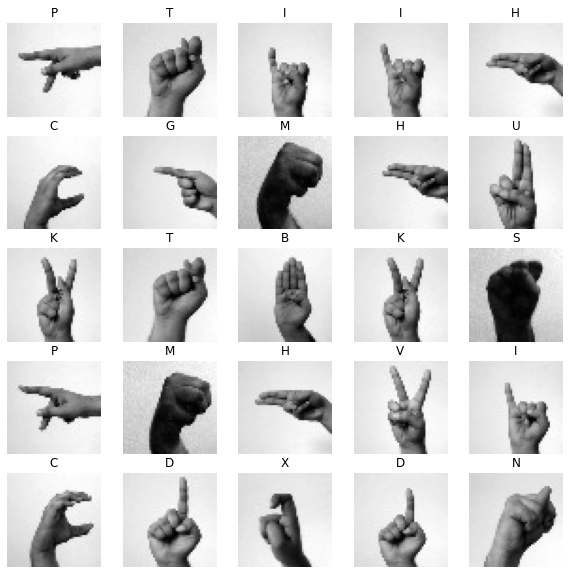

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5,5, i + 1)
  plt.title(labels[np.argmax(y_test[i])])
  plt.imshow(x_test_gray[i].reshape(50,50), cmap='gray') #400,400
  plt.axis("off")

In [ ]:
x_test_gray = tf.image.resize(x_test_gray, [28, 28])
print(x_test_gray.shape)

(1680, 28, 28, 1)


In [ ]:
x_test_gray /=255

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model6_grayscale.hdf5')

In [ ]:
model.evaluate(x_test_gray, y_test)

53/53 [==============================] - 1s 5ms/step - loss: 10.9728 - accuracy: 0.3625 - f1_score: 0.3194 - precision: 0.3682 - recall: 0.3601


[10.9727783203125,
 0.36250001192092896,
 array([0.4090909 , 0.5352113 , 0.7387387 , 0.43930638, 0.        ,
        0.41004184, 0.        , 0.5791855 , 0.        , 0.        ,
        0.7407407 , 0.        , 0.        , 0.90909094, 0.37288138,
        0.45662102, 0.08      , 0.        , 0.        , 0.13333334,
        0.97058827, 0.55670106, 0.        , 0.33484167], dtype=float32),
 0.36822885274887085,
 0.3601190447807312]

In [ ]:
predict_x= model.predict(x_test_gray) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)

53/53 [==============================] - 0s 2ms/step
[23 12  9 ...  5 23 18]


In [ ]:
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

In [ ]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       1.00      0.26      0.41        70
           1       0.53      0.54      0.54        70
           2       1.00      0.59      0.74        70
           3       0.37      0.54      0.44        70
           4       0.00      0.00      0.00        70
           5       0.29      0.70      0.41        70
           6       0.00      0.00      0.00        70
           7       0.42      0.91      0.58        70
           8       0.00      0.00      0.00        70
          10       0.00      0.00      0.00        70
          11       0.59      1.00      0.74        70
          12       0.00      0.00      0.00        70
          13       0.00      0.00      0.00        70
          14       0.83      1.00      0.91        70
          15       0.31      0.47      0.37        70
          16       0.34      0.71      0.46        70
          17       0.60      0.04      0.08        70
          18       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


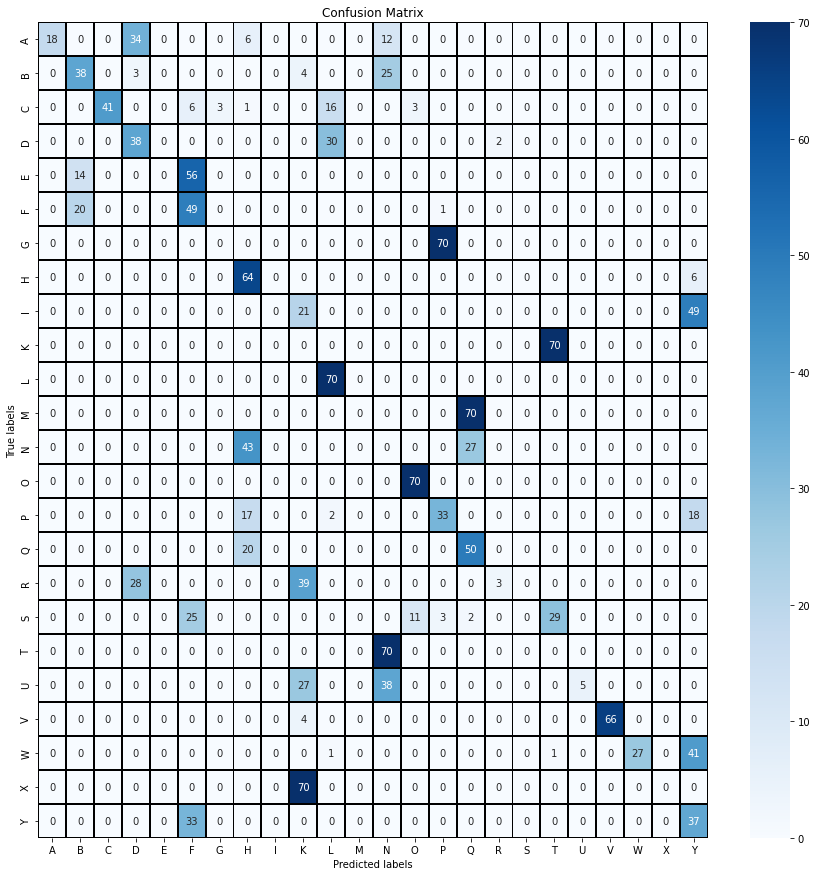

In [ ]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm, index = [i for i in range(25) if i!=9] , columns = [i for i in range(25) if i!=9])
plt.figure(figsize = (15,15))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);